#Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

#Loading the dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Concatinating training and test dataset
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

C:\Users\Kiran Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
train.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [6]:
dataset.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


#Some visualization

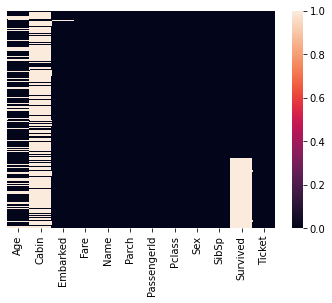

In [7]:
sns.heatmap(dataset.isnull(), yticklabels=False)

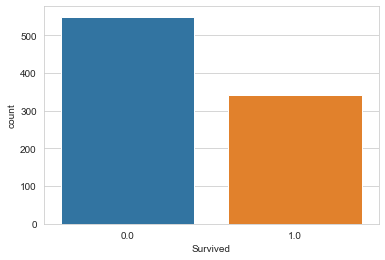

In [8]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', data=dataset)

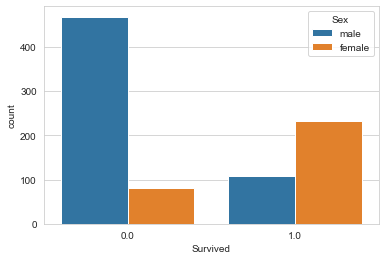

In [9]:
sns.set_style("whitegrid")
sns.countplot(x='Survived',hue='Sex', data=dataset )

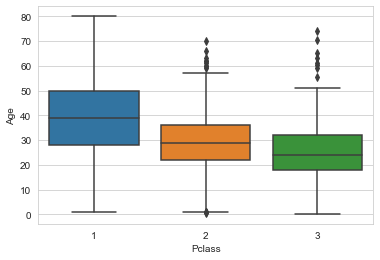

In [10]:
sns.boxplot(x='Pclass', y='Age', data=dataset)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [12]:
dataset.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [15]:
###Dropping variables not important to the model

dataset = dataset.drop(['Name', 'PassengerId', 'Ticket'], axis = 1)

In [16]:
dataset.head()

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,NaN,S,7.2500,0,3,male,1,0.0
1,38.0,C85,C,71.2833,0,1,female,1,1.0
2,26.0,NaN,S,7.9250,0,3,female,0,1.0
3,35.0,C123,S,53.1000,0,1,female,1,1.0
4,35.0,NaN,S,8.0500,0,3,male,0,0.0


In [17]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = dataset, target = 'Survived')

Setup Succesfully Completed!


,Description,Value
0,session_id,233
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1309, 9)"
4,Missing Values,True
5,Numeric Features,2
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [18]:
#comparing models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.8169,0.843,0.7063,0.7936,0.7449,0.6033,0.6079,0.1127
1,Gradient Boosting Classifier,0.8137,0.8604,0.6726,0.8147,0.7303,0.5911,0.6016,0.2955
2,CatBoost Classifier,0.8137,0.8622,0.6601,0.821,0.7272,0.5892,0.6001,4.102
3,Ridge Classifier,0.8008,0,0.6768,0.773,0.7195,0.5666,0.5712,0.0306
4,Light Gradient Boosting Machine,0.7992,0.8554,0.698,0.7565,0.7241,0.5671,0.5697,0.2004
5,Ada Boost Classifier,0.7944,0.8285,0.7103,0.7419,0.7239,0.5604,0.5622,0.2015
6,Extreme Gradient Boosting,0.7881,0.8435,0.694,0.7405,0.7118,0.5453,0.5499,0.4727
7,Linear Discriminant Analysis,0.7831,0.8288,0.656,0.7434,0.6951,0.5284,0.5321,0.1805
8,Extra Trees Classifier,0.7655,0.8103,0.6518,0.7204,0.6775,0.495,0.5017,0.321
9,Random Forest Classifier,0.7639,0.8214,0.635,0.7134,0.6681,0.4869,0.4914,0.1318


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=233, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
###Final Model 
catboost=create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8921,0.75,0.8571,0.8,0.6897,0.6934
1,0.8413,0.8974,0.7083,0.85,0.7727,0.6523,0.6587
2,0.8254,0.9092,0.7083,0.8095,0.7556,0.6207,0.624
3,0.7581,0.7146,0.4348,0.8333,0.5714,0.4252,0.4689
4,0.8387,0.92,0.75,0.8182,0.7826,0.6548,0.6564
5,0.7742,0.7906,0.625,0.75,0.6818,0.509,0.5141
6,0.871,0.9167,0.75,0.9,0.8182,0.7195,0.7266
7,0.7742,0.8531,0.5833,0.7778,0.6667,0.5011,0.513
8,0.7903,0.8684,0.7083,0.7391,0.7234,0.5547,0.555
9,0.8065,0.8596,0.5833,0.875,0.7,0.5654,0.5908


In [25]:
### Hyper Tuning of Model
tuned_catboost =tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8718,0.6667,0.8,0.7273,0.5828,0.5885
1,0.8413,0.9006,0.625,0.9375,0.75,0.6404,0.6687
2,0.8254,0.9215,0.6667,0.8421,0.7442,0.6144,0.624
3,0.7097,0.6689,0.4348,0.6667,0.5263,0.3301,0.3458
4,0.7903,0.9309,0.75,0.72,0.7347,0.5615,0.5618
5,0.7903,0.7988,0.5417,0.8667,0.6667,0.5253,0.5562
6,0.871,0.9041,0.7917,0.8636,0.8261,0.7238,0.7256
7,0.7903,0.8416,0.625,0.7895,0.6977,0.5405,0.5491
8,0.7742,0.8673,0.7083,0.7083,0.7083,0.5241,0.5241
9,0.7419,0.8405,0.625,0.6818,0.6522,0.4477,0.4487
